# **1. Setup & Upload File**

In [ ]:
!pip install google-play-scraper Sastrawi scikit-learn pandas numpy matplotlib seaborn
from google.colab import files

# Upload file transjatim.py
uploaded = files.upload()


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 6.2 MB/s eta 0:00:00


Saving transjatim.py to transjatim.py


Lalu jalankan skrip scraping:

In [ ]:
# Jalankan file Python
!python3 transjatim.py

🔍 Mengambil review dari aplikasi: ngi.muchi.jatimajaib
✅ Disimpan ke file: transjatim_comments.csv


# **2. Membaca dan Labeling Sentimen**

In [5]:
import pandas as pd

# Baca file hasil scraping
df = pd.read_csv('transjatim_comments.csv')

# Label otomatis sederhana (bisa ditingkatkan)
positif_keywords = ['bagus', 'mantap', 'cepat', 'baik', 'puas', 'mudah', 'terima kasih', 'nyaman']
negatif_keywords = ['buruk', 'lambat', 'jelek', 'parah', 'mengecewakan', 'macet', 'tidak puas']

def auto_label(text):
    if isinstance(text, str):  # Pastikan teks valid
        for word in positif_keywords:
            if word in text:
                return 'positif'
        for word in negatif_keywords:
            if word in text:
                return 'negatif'
    return 'netral'

df['label'] = df['clean_ulasan'].apply(auto_label)
df = df[df['label'] != 'netral']  # Hanya ambil positif dan negatif


# **3. Balancing Data**

In [6]:
# Seimbangkan jumlah positif dan negatif
min_class = df['label'].value_counts().min()
balanced_df = pd.concat([
    df[df['label'] == 'positif'].sample(min_class, random_state=1),
    df[df['label'] == 'negatif'].sample(min_class, random_state=1)
])
balanced_df = balanced_df.sample(frac=1).reset_index(drop=True)


# **4. Analisis Sentimen (Multi ABAS)**

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(balanced_df['clean_ulasan'])
y = balanced_df['label']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Naive Bayes
model = MultinomialNB()
model.fit(X_train, y_train)

# Evaluasi
y_pred = model.predict(X_test)
print("Akurasi:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Akurasi: 0.5714285714285714
              precision    recall  f1-score   support

     negatif       0.40      1.00      0.57         2
     positif       1.00      0.40      0.57         5

    accuracy                           0.57         7
   macro avg       0.70      0.70      0.57         7
weighted avg       0.83      0.57      0.57         7



# **📌 Output Tambahan:**

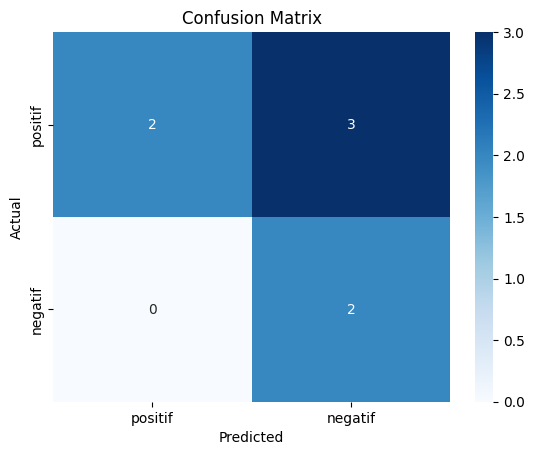

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred, labels=['positif', 'negatif'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['positif', 'negatif'], yticklabels=['positif', 'negatif'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
